# The Spark Foundation Task-4

## Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

## import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## load dataset

In [2]:
data = pd.read_csv('matches.csv')

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Check shape of dataset

In [5]:
data.shape

(756, 18)

## check null value is present or not

In [4]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## check information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


## describe data

In [7]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
data['id'].max()

11415

In [10]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [11]:
len(data['season'].unique())

12

In [14]:
data.iloc[data['win_by_runs'].idxmax()]


id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [45]:
data.iloc[data['win_by_runs'].idxmax()]['winner']  # Mumbai Indian won by maximum runs

'Mumbai Indians'

In [46]:
data.iloc[data['win_by_wickets'].idxmax()]['winner']  # Kolkata Knight Riders won by maximum wickets

'Kolkata Knight Riders'

In [47]:
data.iloc[data[data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']  # Mumbai Indian won by minimum runs

'Mumbai Indians'

In [48]:
data.iloc[data[data['win_by_wickets'].ge(1)].win_by_runs.idxmin()]['winner']  # Rising Pune Supergiant won by maximum wickets

'Rising Pune Supergiant'

## In 2013, we have the most number of matches, you can see in below graph

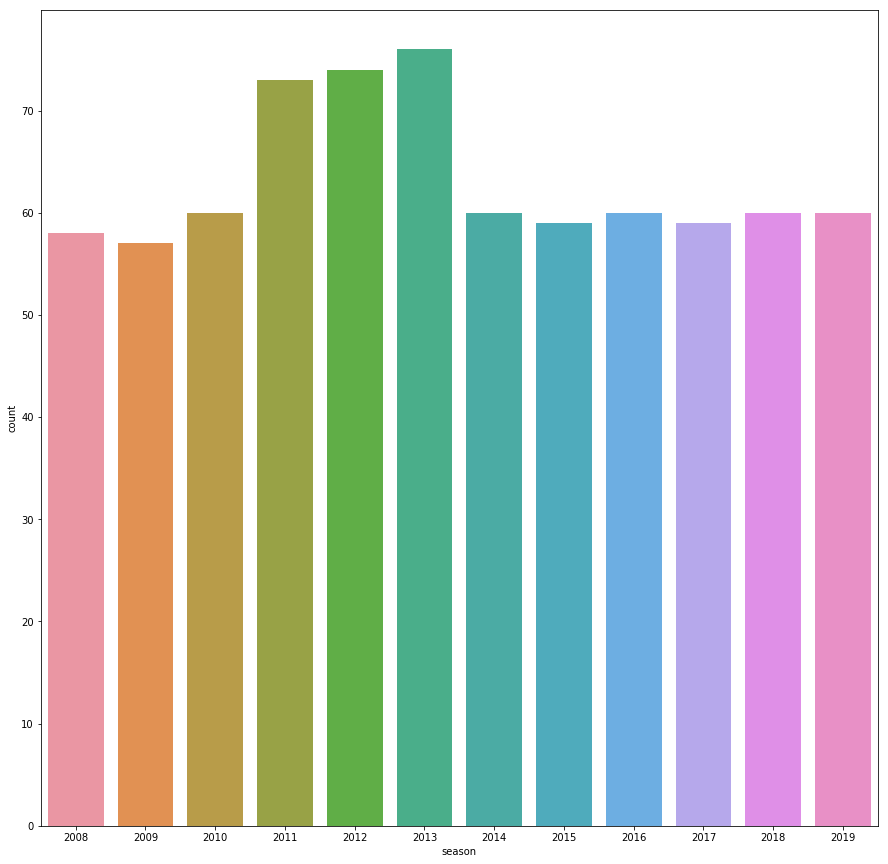

In [49]:
plt.figure(figsize=(15,15))
sns.countplot(x='season',data=data)
plt.show()

## Mumbai Indians are the winners in most of the matches, you can see in below graph

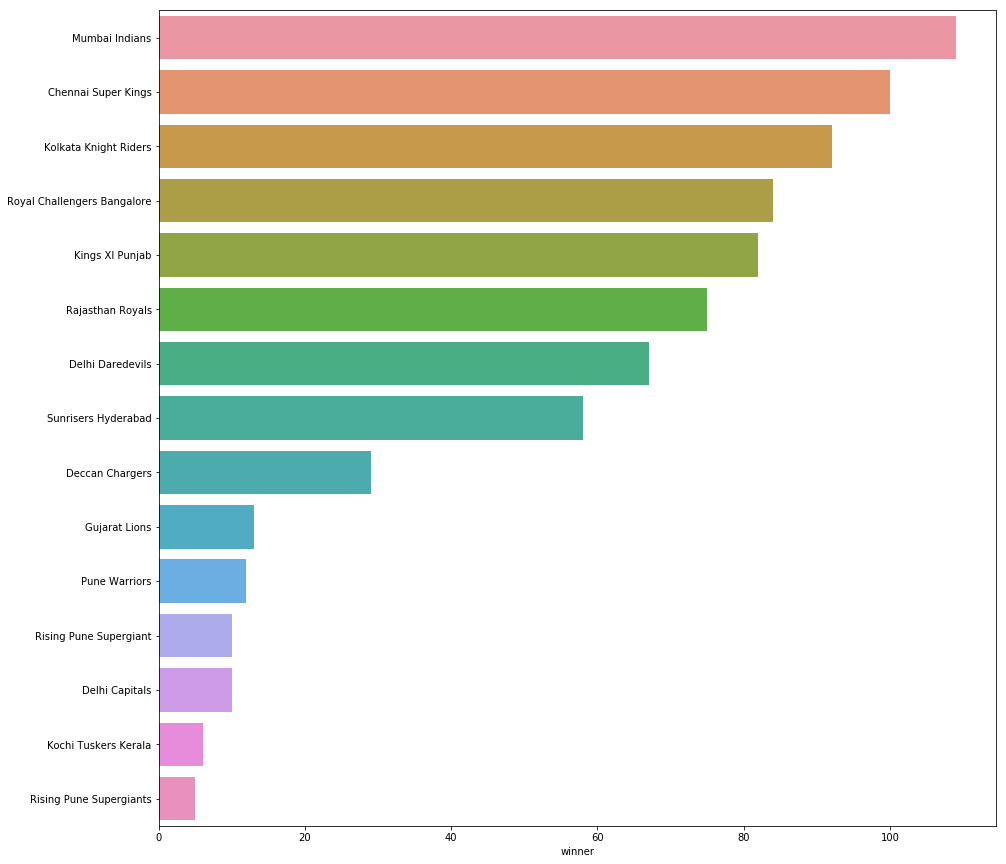

In [30]:
plt.figure(figsize=(15,15))
winner = data.winner.value_counts()
sns.barplot(y=winner.index , x=winner , orient='h')

## CH Gayle is the most Successful player in all match winners, You can see in the below graph

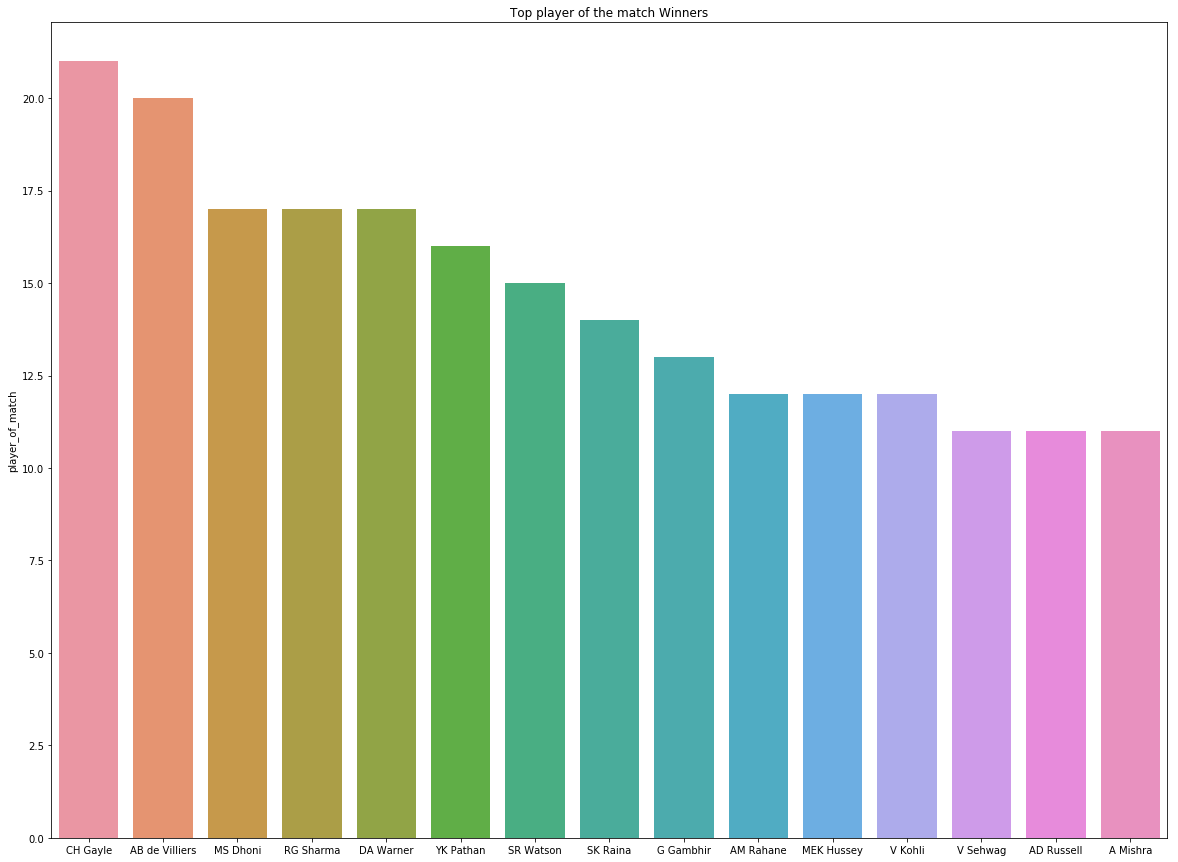

In [42]:
plt.figure(figsize=(20,15))
player = data.player_of_match.value_counts()[:15]
plt.title("Top player of the match Winners")
sns.barplot(x=player.index , y=player,orient='v',)

# Thank You !!!!